# Inverse Demand Problem

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demintro02.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon.demos import demo
%matplotlib inline

In [2]:
demand = lambda p: 0.5 * p ** -0.2 + 0.5 * p ** -0.5
derivative = lambda p: -0.01 * p ** -1.2 - 0.25 * p ** -1.5


print('%12s %8s' % ('Iteration', 'Price'))
p = 0.25
for it in range(100):
    f = demand(p) - 2
    d = derivative(p)
    s = -f / d
    p += s
    print(f'{it:10d}   {p:8.4f}')
    if np.linalg.norm(s) < 1.0e-8:
        break

pstar = p
qstar = demand(pstar)
print(f'The equilibrium price is {pstar:.3f}, where demand is {qstar:.2f}')

   Iteration    Price
         0     0.0843
         1     0.1363
         2     0.1558
         3     0.1539
         4     0.1543
         5     0.1542
         6     0.1542
         7     0.1542
         8     0.1542
         9     0.1542
        10     0.1542
        11     0.1542
The equilibrium price is 0.154, where demand is 2.00


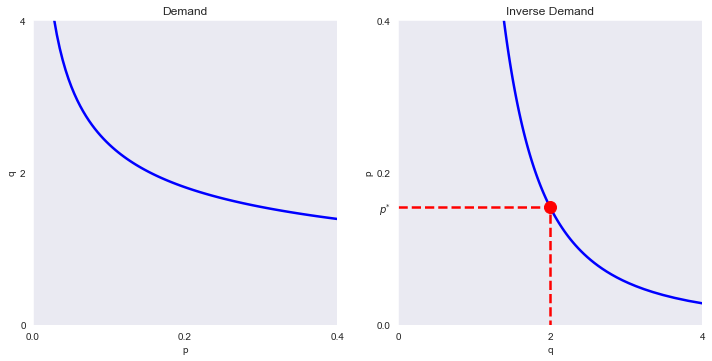

In [3]:
# Generate demand function
n, a, b = 100, 0.02, 0.40
p = np.linspace(a, b, n)
q = demand(p)

# Graph demand function
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121, title='Demand', aspect=0.1,
                      xlabel='p', xticks=[0.0, 0.2, 0.4], xlim=[0, 0.4],
                      ylabel='q', yticks=[0, 2, 4], ylim=[0, 4])
ax1.plot(p, q, 'b')



# Graph inverse demand function
ax2 = fig.add_subplot(122, title='Inverse Demand', aspect=10,
                      xlabel='q', xticks=[0, 2, 4], xlim=[0, 4],
                      ylabel='p', yticks=[0.0, pstar, 0.2, 0.4],
                      yticklabels=['0.0', '$p^{*}$', '0.2', '0.4'], ylim=[0, 0.4])
ax2.plot(q, p, 'b')
ax2.plot([0, 2, 2], [pstar, pstar, 0], 'r--')
ax2.plot([2], [pstar], 'ro', markersize=12)

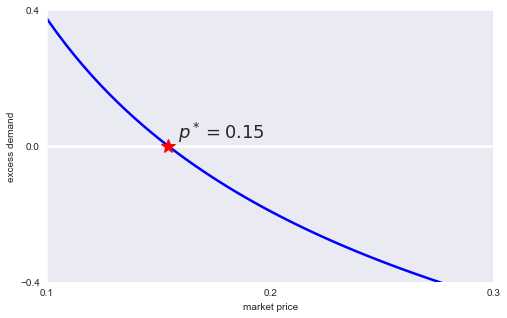

In [4]:
fig = plt.figure(figsize=[8,5])
ax0 = fig.add_subplot(111, xlabel='market price', xticks=[0.1, 0.2, 0.3], xlim=[0.1, 0.3],
                      ylabel='excess demand', yticks=[-0.4, 0, 0.4], ylim=[-0.4, 0.4])
ax0.hlines(0,0.1,0.3,colors='w')
ax0.plot(p, q-2, 'b')
demo.annotate(pstar,0,f'$p^*={pstar:.2f}$','r*',[12,5])